In [211]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# 加载数据

In [212]:
# 加载数据
col_name = ["乘客id", "存活", "舱位等级", "姓名", "性别", "年龄", "兄弟姐妹个数", "父母子女个数", "船票信息", "票价", "客舱", "登船港口"]
train_data = pd.read_csv("./data/train.csv", names = col_name, index_col='乘客id', header=0)

In [213]:
# 查看前10行
train_data.head(10)

,存活,舱位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口
乘客id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


# 数据探索

In [214]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   存活      891 non-null    int64  
 1   舱位等级    891 non-null    int64  
 2   姓名      891 non-null    object 
 3   性别      891 non-null    object 
 4   年龄      714 non-null    float64
 5   兄弟姐妹个数  891 non-null    int64  
 6   父母子女个数  891 non-null    int64  
 7   船票信息    891 non-null    object 
 8   票价      891 non-null    float64
 9   客舱      204 non-null    object 
 10  登船港口    889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [215]:
train_data.describe()

,存活,舱位等级,年龄,兄弟姐妹个数,父母子女个数,票价
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [216]:
# 查看幸存者的总体描述
train_data[train_data["存活"] == 1].describe()

,存活,舱位等级,年龄,兄弟姐妹个数,父母子女个数,票价
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [217]:
# 查看非幸存者的总体描述
train_data[train_data["存活"] == 0].describe()

,存活,舱位等级,年龄,兄弟姐妹个数,父母子女个数,票价
count,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


# 数据清洗

In [218]:
# 缺失值情况
train_data.isnull().sum()

存活          0
舱位等级        0
姓名          0
性别          0
年龄        177
兄弟姐妹个数      0
父母子女个数      0
船票信息        0
票价          0
客舱        687
登船港口        2
dtype: int64

In [219]:
# 以均值替换年龄
age_mean = train_data['年龄'].mean()
train_data['年龄'] = train_data[['年龄']].fillna(age_mean)

In [220]:
# 删除客舱列

train_data.drop(columns=['客舱'], inplace=True)

train_data

,存活,舱位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,登船港口
乘客id,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [221]:
# 删除登船港口缺失的行

train_data.dropna(axis=0, subset=['登船港口'], inplace=True)

train_data[['登船港口']].value_counts()

登船港口
S       644
C       168
Q        77
Name: count, dtype: int64

In [222]:
train_data.isnull().sum()

存活        0
舱位等级      0
姓名        0
性别        0
年龄        0
兄弟姐妹个数    0
父母子女个数    0
船票信息      0
票价        0
登船港口      0
dtype: int64

In [223]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   存活      889 non-null    int64  
 1   舱位等级    889 non-null    int64  
 2   姓名      889 non-null    object 
 3   性别      889 non-null    object 
 4   年龄      889 non-null    float64
 5   兄弟姐妹个数  889 non-null    int64  
 6   父母子女个数  889 non-null    int64  
 7   船票信息    889 non-null    object 
 8   票价      889 non-null    float64
 9   登船港口    889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


# 分析

In [224]:
train_data['登船港口'].value_counts()

登船港口
S    644
C    168
Q     77
Name: count, dtype: int64

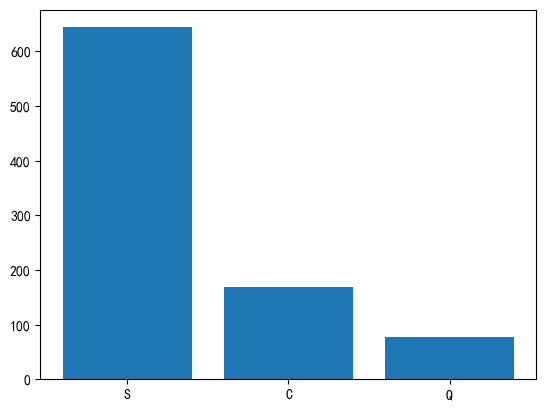

In [225]:
from collections import Counter

cnt = Counter(train_data['登船港口'])

k = cnt.keys()
v = cnt.values()

plt.bar(k, v)
plt.show()

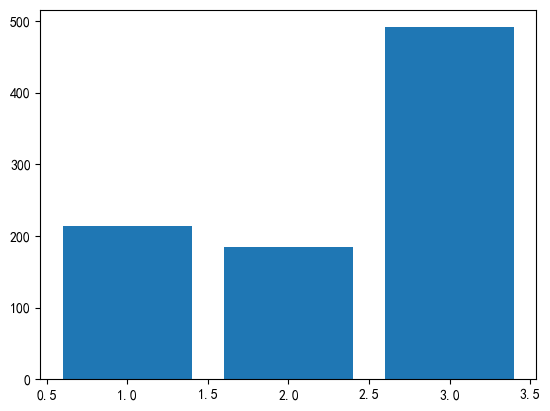

In [226]:
cnt = Counter(train_data['舱位等级'])

k = cnt.keys()
v = cnt.values()

plt.bar(k, v)
plt.show()

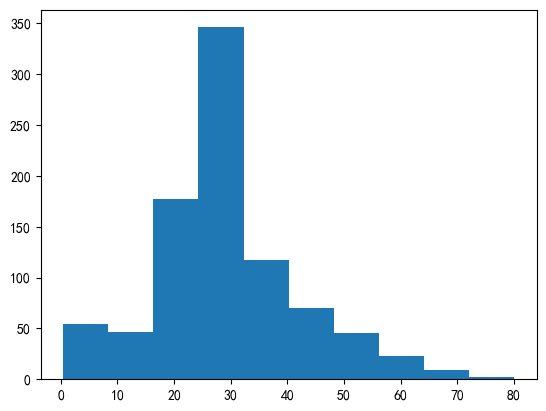

In [227]:
# 年龄频率直方图
plt.hist(train_data['年龄'])
plt.show()

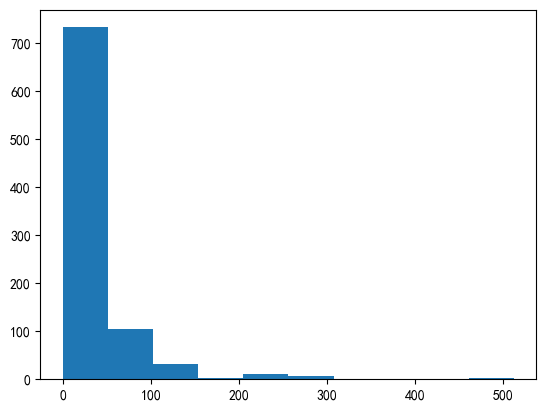

In [228]:
# 票价频率直方图
plt.hist(train_data['票价'])
plt.show()

In [229]:
T = train_data.groupby(['性别', '存活'])['存活'].count().unstack()

T

存活,0,1
性别,,
female,81,231
male,468,109


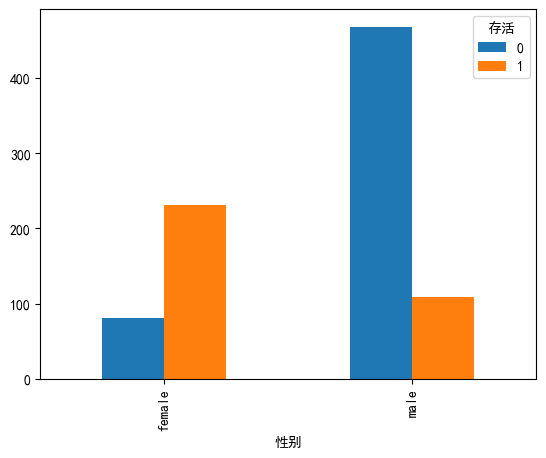

In [230]:
plt.rcParams['font.sans-serif'] = ['SimHei']

T.plot(kind='bar')
plt.show()

# 建模

In [231]:
train_data

,存活,舱位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,登船港口
乘客id,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [232]:
# 分割数据
train_data_x = train_data.drop(columns=['存活'])
train_data_y = train_data[['存活']]

In [233]:
train_data_x

,舱位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,登船港口
乘客id,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


In [234]:
# 姓名和船票信息对建模没有影响, 去除

train_data_x = train_data_x.drop(columns=['姓名', '船票信息'])

train_data_x

,舱位等级,性别,年龄,兄弟姐妹个数,父母子女个数,票价,登船港口
乘客id,,,,,,,
1,3,male,22.000000,1,0,7.2500,S
2,1,female,38.000000,1,0,71.2833,C
3,3,female,26.000000,0,0,7.9250,S
4,1,female,35.000000,1,0,53.1000,S
5,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,2,male,27.000000,0,0,13.0000,S
888,1,female,19.000000,0,0,30.0000,S
889,3,female,29.699118,1,2,23.4500,S


In [235]:
# 对性别, 登船港口进行独热编码

gender_ohe = pd.get_dummies(train_data_x['性别'], prefix='性别')
train_data_x = pd.concat([train_data_x, gender_ohe], axis=1)

gender_ohe = pd.get_dummies(train_data_x['登船港口'], prefix='登船港口')
train_data_x = pd.concat([train_data_x, gender_ohe], axis=1)

train_data_x

,舱位等级,性别,年龄,兄弟姐妹个数,父母子女个数,票价,登船港口,性别_female,性别_male,登船港口_C,登船港口_Q,登船港口_S
乘客id,,,,,,,,,,,,
1,3,male,22.000000,1,0,7.2500,S,False,True,False,False,True
2,1,female,38.000000,1,0,71.2833,C,True,False,True,False,False
3,3,female,26.000000,0,0,7.9250,S,True,False,False,False,True
4,1,female,35.000000,1,0,53.1000,S,True,False,False,False,True
5,3,male,35.000000,0,0,8.0500,S,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,male,27.000000,0,0,13.0000,S,False,True,False,False,True
888,1,female,19.000000,0,0,30.0000,S,True,False,False,False,True
889,3,female,29.699118,1,2,23.4500,S,True,False,False,False,True


In [236]:
train_data_x.drop(columns=['性别', '登船港口'], inplace=True)

train_data_x

,舱位等级,年龄,兄弟姐妹个数,父母子女个数,票价,性别_female,性别_male,登船港口_C,登船港口_Q,登船港口_S
乘客id,,,,,,,,,,
1,3,22.000000,1,0,7.2500,False,True,False,False,True
2,1,38.000000,1,0,71.2833,True,False,True,False,False
3,3,26.000000,0,0,7.9250,True,False,False,False,True
4,1,35.000000,1,0,53.1000,True,False,False,False,True
5,3,35.000000,0,0,8.0500,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
887,2,27.000000,0,0,13.0000,False,True,False,False,True
888,1,19.000000,0,0,30.0000,True,False,False,False,True
889,3,29.699118,1,2,23.4500,True,False,False,False,True


In [237]:
# 划分数据集

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data_x, train_data_y, random_state=42, stratify=train_data_y)

X_train.shape, y_train.shape

((666, 10), (666, 1))

In [238]:
# 逻辑回归


from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train.iloc[:, 0].values)

c:\Users\22379\.conda\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [239]:
lr_model.score(X_train, y_train)

0.8003003003003003

In [240]:
lr_model.score(X_test, y_test)

0.7847533632286996

In [241]:
# 随机森林

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train.iloc[:, 0].values)

RandomForestClassifier(random_state=42)

In [242]:
rf_model.score(X_train, y_train), rf_model.score(X_test, y_test)

(0.984984984984985, 0.8026905829596412)

<Axes: >

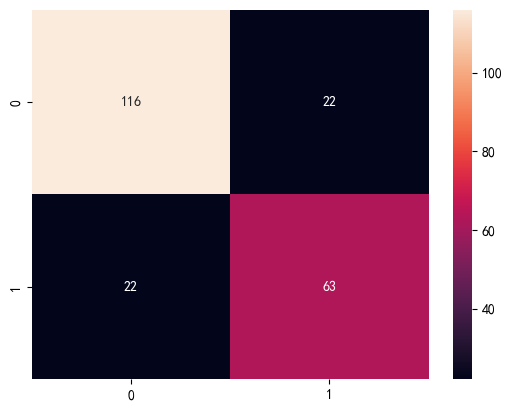

In [243]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


y_pred = rf_model.predict(X_test)
y_pred

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt="d",annot=True)

In [244]:
# 加载测试数据

col_name = ["乘客id", "舱位等级", "姓名", "性别", "年龄", "兄弟姐妹个数", "父母子女个数", "船票信息", "票价", "客舱", "登船港口"]
test_data = pd.read_csv("./data/test.csv", names = col_name, index_col='乘客id', header=0)

test_data

,舱位等级,姓名,性别,年龄,兄弟姐妹个数,父母子女个数,船票信息,票价,客舱,登船港口
乘客id,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [245]:
# 填充年龄空值
test_data['年龄'] = test_data[['年龄']].fillna(age_mean)

test_data['年龄']

乘客id
892     34.500000
893     47.000000
894     62.000000
895     27.000000
896     22.000000
          ...    
1305    29.699118
1306    39.000000
1307    38.500000
1308    29.699118
1309    29.699118
Name: 年龄, Length: 418, dtype: float64

In [246]:
# 删除 姓名\船票信息\客舱 列

test_data.drop(columns=['姓名', '船票信息', '客舱'], inplace=True)
test_data

,舱位等级,性别,年龄,兄弟姐妹个数,父母子女个数,票价,登船港口
乘客id,,,,,,,
892,3,male,34.500000,0,0,7.8292,Q
893,3,female,47.000000,1,0,7.0000,S
894,2,male,62.000000,0,0,9.6875,Q
895,3,male,27.000000,0,0,8.6625,S
896,3,female,22.000000,1,1,12.2875,S
...,...,...,...,...,...,...,...
1305,3,male,29.699118,0,0,8.0500,S
1306,1,female,39.000000,0,0,108.9000,C
1307,3,male,38.500000,0,0,7.2500,S


In [247]:
test_data.isnull().sum()

舱位等级      0
性别        0
年龄        0
兄弟姐妹个数    0
父母子女个数    0
票价        1
登船港口      0
dtype: int64

In [248]:
test_data.fillna(train_data['票价'].mean(), inplace=True) # 以训练集票均值填充

In [249]:
# 独热编码

gender_ohe = pd.get_dummies(test_data['性别'], prefix='性别')
test_data = pd.concat([test_data, gender_ohe], axis=1)

gender_ohe = pd.get_dummies(test_data['登船港口'], prefix='登船港口')
test_data = pd.concat([test_data, gender_ohe], axis=1)

test_data

,舱位等级,性别,年龄,兄弟姐妹个数,父母子女个数,票价,登船港口,性别_female,性别_male,登船港口_C,登船港口_Q,登船港口_S
乘客id,,,,,,,,,,,,
892,3,male,34.500000,0,0,7.8292,Q,False,True,False,True,False
893,3,female,47.000000,1,0,7.0000,S,True,False,False,False,True
894,2,male,62.000000,0,0,9.6875,Q,False,True,False,True,False
895,3,male,27.000000,0,0,8.6625,S,False,True,False,False,True
896,3,female,22.000000,1,1,12.2875,S,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,male,29.699118,0,0,8.0500,S,False,True,False,False,True
1306,1,female,39.000000,0,0,108.9000,C,True,False,True,False,False
1307,3,male,38.500000,0,0,7.2500,S,False,True,False,False,True


In [250]:
test_data.drop(columns=['性别', '登船港口'], inplace=True)

test_data

,舱位等级,年龄,兄弟姐妹个数,父母子女个数,票价,性别_female,性别_male,登船港口_C,登船港口_Q,登船港口_S
乘客id,,,,,,,,,,
892,3,34.500000,0,0,7.8292,False,True,False,True,False
893,3,47.000000,1,0,7.0000,True,False,False,False,True
894,2,62.000000,0,0,9.6875,False,True,False,True,False
895,3,27.000000,0,0,8.6625,False,True,False,False,True
896,3,22.000000,1,1,12.2875,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
1305,3,29.699118,0,0,8.0500,False,True,False,False,True
1306,1,39.000000,0,0,108.9000,True,False,True,False,False
1307,3,38.500000,0,0,7.2500,False,True,False,False,True


In [251]:
test_y_pred = rf_model.predict(test_data)

test_y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [252]:
result = pd.DataFrame({"Survived": test_y_pred}, index=test_data.index.values)
result.index.name = "PassengerId"

result

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [253]:
result.to_csv("./result/submit.csv")